### Import modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### User selects stocks to track

In [2]:
ticker_list = []

while True:
    ticker = input('Enter stock ticker to track, after all have been entered type "Done": ')
    
    if ticker == "Done":
        break
    else:
        ticker_list.append(ticker)

Enter stock ticker to track, after all have been entered type "Done": F
Enter stock ticker to track, after all have been entered type "Done": AMD
Enter stock ticker to track, after all have been entered type "Done": BAC
Enter stock ticker to track, after all have been entered type "Done": GE
Enter stock ticker to track, after all have been entered type "Done": Done


### Collect data from past 5 years for selected stocks

In [3]:
tickers = ' '.join(ticker_list)
 
yahoo_data = yf.download(tickers = tickers,
                         period = '5y',
                         interval = '1d',
                         group_by = 'ticker')


[*********************100%***********************]  4 of 4 completed


### Organize data into a tidy dataframe for plotting

In [4]:
close_list = []

for i in range(len(ticker_list)):
    close_list.append("Close")

mask = [item for item in zip(ticker_list, close_list)]

In [5]:
df = (yahoo_data
          .filter(items = mask)
          .reset_index()
          .droplevel(1, axis = 1)
          .melt(id_vars = ['Date'], value_vars = ticker_list, var_name = 'Ticker', value_name = 'Price')
          .query('Price == Price')
          .reset_index(drop = True))

### Create plot

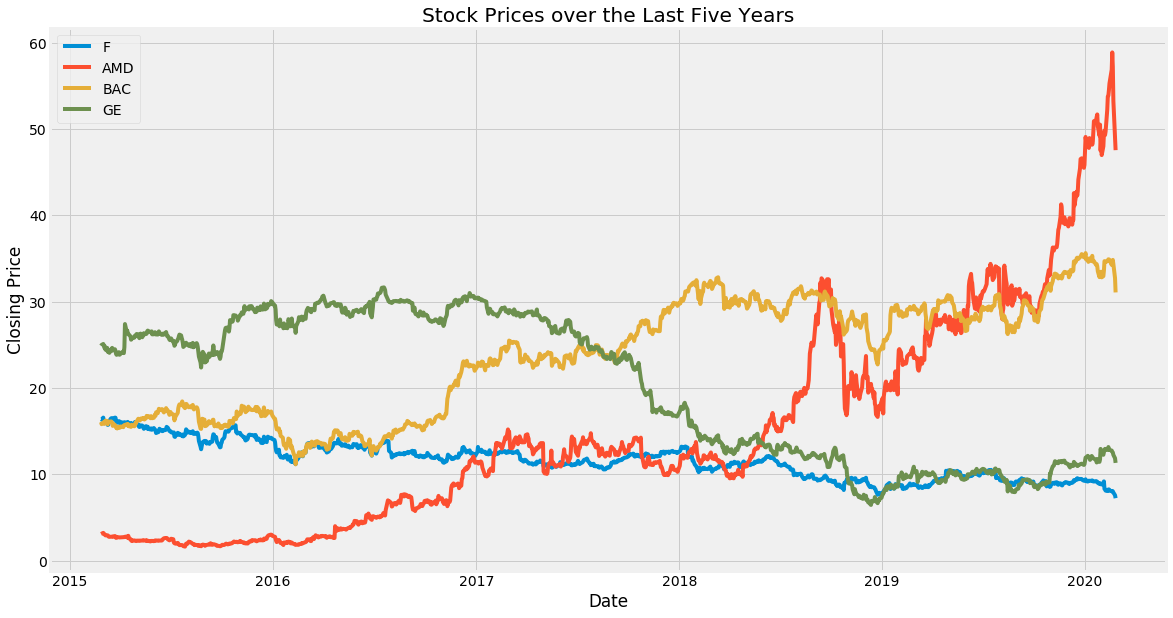

In [8]:
plt.figure(figsize = (20, 10))

plt.style.use('fivethirtyeight')

for i in range(len(ticker_list)):
    plt.plot(df[df['Ticker'] == ticker_list[i]]['Date'],
             df[df['Ticker'] == ticker_list[i]]['Price'],
             label = ticker_list[i])

plt.title('Stock Prices over the Last Five Years')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Closing Price')

fname = str('_'.join(ticker_list) + '.png')

plt.savefig(fname = fname)

### Open and display plot

In [9]:
img = Image.open(fname)
img.show()